<a href="https://colab.research.google.com/github/indavarapuaneesh/mission_intern/blob/master/fastai_dl_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [4]:
path = untar_data(URLs.BIWI_HEAD_POSE)


In [0]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)

In [0]:
fname = '09/frame_00667_rgb.jpg'

In [0]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

In [0]:
img = open_image(path/fname)

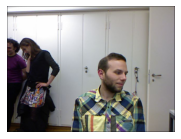

In [15]:
img.show()

In [0]:
ctr = np.genfromtxt(img2txt_name(fname),skip_header=3)

In [17]:
ctr

array([187.332 ,  40.3892, 893.135 ])

In [0]:
def convert_biwi(coords):
  c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
  c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]

  return tensor([c2,c1])

def get_ctr(f):
  ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
  return convert_biwi(ctr)

def get_ip(img, pts):
  return ImagePoints(FlowField(img.size, pts), scale=True)

In [23]:
get_ctr(fname)

tensor([263.9104, 428.5814])

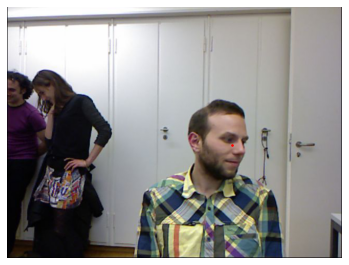

In [24]:
ctr = get_ctr(fname)
img.show(y=get_ip(img, ctr), figsize=(6,6))

In [0]:
data = PointsItemList.from_folder(path) #first get the pictures

In [0]:
data = data.split_by_valid_func(lambda o: o.parent.name=='13')

In [0]:
data = data.label_from_func(get_ctr)

In [0]:
data = data.transform(get_transforms(), tfm_y=True, size=(120,160))

In [0]:
data = data.databunch().normalize(imagenet_stats)

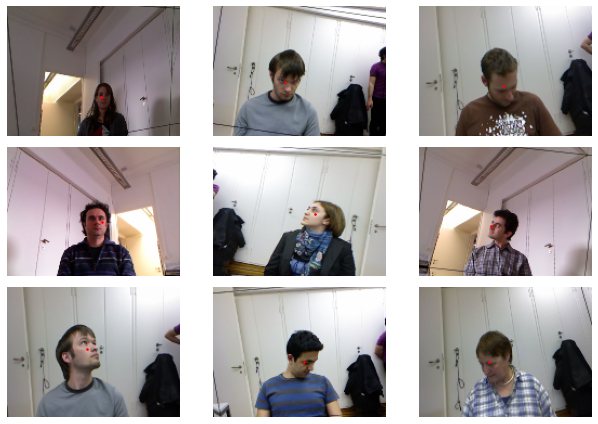

In [32]:
data.show_batch(3, figsize=(9,6))

In [33]:
learn = cnn_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [34]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


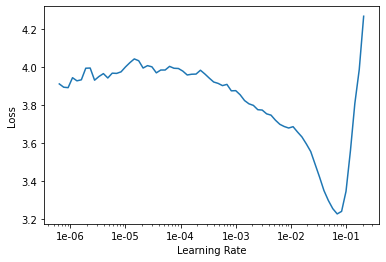

In [35]:
learn.recorder.plot()

In [0]:
lr = 2e-2

In [37]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,0.120330,0.007879,02:47
1,0.040217,0.015383,02:45
2,0.014720,0.002692,02:53
3,0.008503,0.002678,02:47
4,0.006551,0.001342,02:46


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

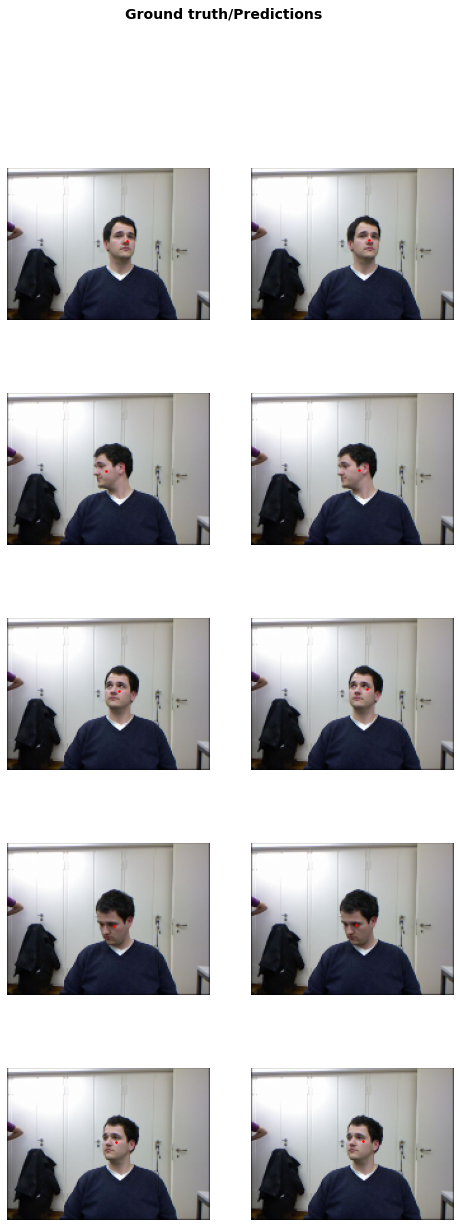

In [40]:
learn.show_results()

In [41]:
tfms = get_transforms(max_rotate=20, max_zoom=1.5, max_lighting=0.5, max_warp=0.4, p_affine=1., p_lighting=1.)


data = PointsItemList.from_folder(path).split_by_valid_func(lambda o:o.parent.name=='13').label_from_func(get_ctr).transform(tfms, tfm_y=True, size=(120,160)).databunch().normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:272: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.Size([3, 120, 160]), torch.

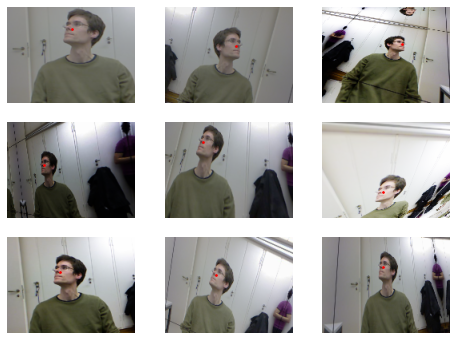

In [42]:
def _plot(i,j, ax):
  x,y = data.train_ds[0]
  x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,6))